# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: Mon, October 24, by 11:59pm</p>


Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Question 1 - Stochastic Gradient Descent (10pts)

1. Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. There should be a _fit_ function that takes parameters X, y, learning rate, and number of iterations, and a _predict_ function that takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01] . Plot MSE and the $w$ parameters as a function of epoch count.

# Question 2: Gradient Descent (5 pts)

Suppose we are trying to use gradient descent to minimize a cost function y = f(w) as shown in the figure below. This function is linearly decreasing between A and B, constant between B and C, quadratic between C and D and constant between D and E. Assume that we have 10000 data points in our training set. If we choose the starting point between B and C, will we be able to find the local minima? Explain your answer. If your answer is "Yes", can you give a bound on the number of iterations required to get to the local minima?

<img src="sgd.png">

# Question 3: Multi-layer Perceptron regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the same dataset used in HW2 Q5: Hitters.csv [here](https://rdrr.io/cran/ISLR/man/Hitters.html). 

Following code will load and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('Hitters.csv')
label_name = 'Salary'
y = data[label_name]
X = data.drop(label_name,axis=1)
print X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

1) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.001
    
Now, consider two different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (15,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a) and (b) (6pts)
   
   
2) Now, using the same parameters used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works better, (a) or (b)? Briefly analyze the result in terms of the number of hidden units. (5pts)


3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each iteration. For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot two curves for model (a) and (b) in one figure, where *X-axis* is iteration number and *Y-axis* is squared root of *loss\_curve\_* value. (4pts)

# Question 4 - Bayesian Classifiers (10 pts)

Download the Smarket dataset from Canvas. This contains about four years worth of daily prices for one stock. The goal is to predict whether or not the stock price will go up or down, and the features are the stock prices of the last five days.  
The code below loads the dataset and all necessary sklearn modules (not that you can't use more if you feel like it). Look up any module on the scikit-learn website for a full description.

1. The last 50 points will be the test dataset. For training, use the 1000 points prior to these 50 test points.
2. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the stock price going up for each row in the test set.
3. Plot the receiver operating characteristic (ROC) curve of each model, using the extracted probabilities and the true values for the test set. (3 pts)
4. Report the area under the ROC curve (AUC) for each model. (2 pts)
6. Justify the performance of each model, relative to the others. (1 pts)
7. Repeat steps 1-6, only using the prior 100 points for training. Explain the changes in model performance. (4 pts)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
data = pd.read_csv('Smarket.csv', usecols=['Lag1','Lag2','Lag3','Lag4','Lag5','Direction'])

# Question 5 - Logistic Regression (15pts)

In this question we will be predicting mile per gallon (mpg) for Auto data set. ('Auto.csv' in Canvas)
1. Convert mpg to a binary variable mpg01 which is 1 if had an mpg is greater than median mpg and zero otherwise
2. Split the data into training and test. Use 42 as random seed and use 1/3rd of the data for testing. Our y variable is mpg01 and X matrix includes all the other variables except mpg01.
3. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "mpg01 = 0" class, the "mpg01 = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.
4. Repeat step 3 except use l2 penalty with Cs of [0.001,0.01, 0.1, 1, 10 ,100, 1000]. You will want to use k-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).
5. Repeat question 4 except use l1 instead of l2 as the penalty type, use Cs of  [0.001, 0.01, ..., 1000]
6. Which model produces the best average per-class accuracy? Why do you think this is the case? How do the models handle the different classes, and why is this so?

Following code will load and clean the dataset and load some useful functions

In [3]:
import pandas as pd
import numpy as np

from sklearn import cross_validation
# from sklearn import model_selection # Use model_selection instead of cross_validation in sklearn version >=0.18
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.grid_search import GridSearchCV

Auto = pd.read_csv('Auto.csv', na_values='?').drop('name',axis = 1).dropna()
Auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18,8,307,130,3504,12.0,70,1
1,15,8,350,165,3693,11.5,70,1
2,18,8,318,150,3436,11.0,70,1
3,16,8,304,150,3433,12.0,70,1
4,17,8,302,140,3449,10.5,70,1


# Question 6: House Prices (kaggle competition) (25 pts)

In this problem, we are going to explore a kaggle competition: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Your goal is to obtain the best score you can in this competition. This is an ongoing competition, and you have the opportunity to win the prize money! 

The first step is to make a Kaggle account. Then find the House Prices competition and read the competition details and the description of the dataset. You may find this [article](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf) useful.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any skewed features and consider applying suitable transformation techniques to make them more "normal").
 * Impute the missing values (if any).
2. Predictive Models. 
 * You have to create at least three models: simple linear regression, Lasso and Ridge regression and multilayer perceptron. You may consider creating an ensemble of these models as well (optional). For Lasso and Ridge regression, optimize the alphas using cross validation. You may try other predictive models to get better scores (optional).
3. Evaluation: submit your model to kaggle submission site and report the public score.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Read in data

In [2]:
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

In [3]:
# Concat all data together to perform same data transformations
all_data = pd.concat((train_df.loc[:,'MSSubClass':'SaleCondition'],
                      test_df.loc[:,'MSSubClass':'SaleCondition']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B5D3668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C60E320>]], dtype=object)

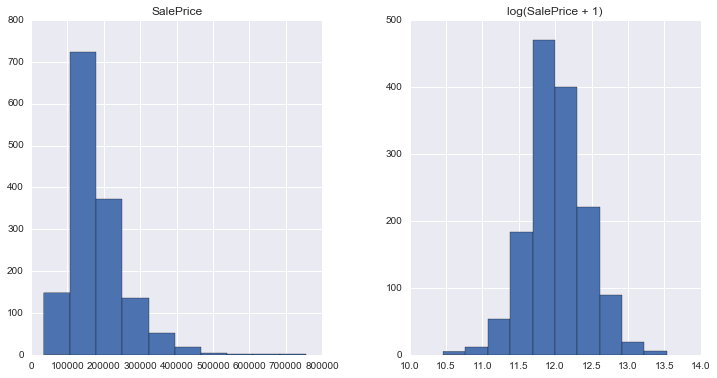

In [4]:
# Plot distribution of SalePrice vs the log of SalePrice
# We see that taking the log normalizes SalePrice
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"SalePrice":train_df["SalePrice"], "log(SalePrice + 1)":np.log1p(train_df["SalePrice"])})
prices.hist()

### Data Preprocessing

In [5]:
#log transform the target:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train_df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [6]:
# Dummy code categorical variables
all_data = pd.get_dummies(all_data)

#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

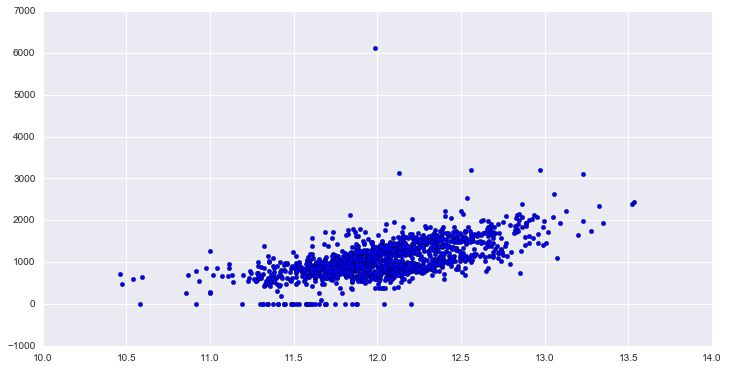

In [9]:
plt.scatter(train_df['SalePrice'], train_df['TotalBsmtSF'])

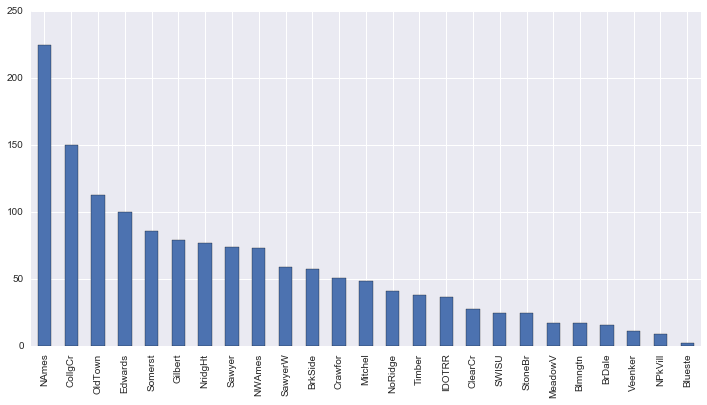

In [10]:
train_df['Neighborhood'].value_counts().plot(kind='bar')

### Training and Test Sets

In [141]:
#creating matrices for sklearn:
X_train = all_data[:train_df.shape[0]]
X_test = all_data[train_df.shape[0]:]
y = train_df.SalePrice

### Linear Regression

In [142]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

In [143]:
LRx_train, LRx_test, LRy_train, LRy_test = train_test_split(X_train, y, test_size = 0.3, random_state = 10)

In [144]:
# Set up matrix for correlation
LRx_train_corr = LRx_train.copy(deep=True)
LRx_train_corr['SalePrice'] = y

In [145]:
# Find the correlations of all variables to SalePrice
corr = LRx_train_corr.corr()
corr['SalePrice'].sort_values(ascending = False)

SalePrice               1.000000
OverallQual             0.817686
GrLivArea               0.719584
GarageCars              0.675443
GarageArea              0.655853
1stFlrSF                0.599994
FullBath                0.593199
YearBuilt               0.586558
YearRemodAdd            0.557194
Foundation_PConc        0.545957
TotRmsAbvGrd            0.530530
ExterQual_Gd            0.518072
GarageYrBlt             0.511039
Fireplaces              0.476097
BsmtQual_Ex             0.473161
HeatingQC_Ex            0.472045
OpenPorchSF             0.470773
KitchenQual_Ex          0.434945
BsmtFinType1_GLQ        0.427292
GarageFinish_Fin        0.421433
LotArea                 0.414270
GarageType_Attchd       0.401183
MasVnrArea              0.400805
KitchenQual_Gd          0.386592
TotalBsmtSF             0.371356
LotFrontage             0.370071
Neighborhood_NridgHt    0.365465
ExterQual_Ex            0.360525
FireplaceQu_Gd          0.358813
WoodDeckSF              0.358409
          

In [146]:
# Extract top features via correlations
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'FullBath']

LRx_train = LRx_train[features]
LRx_test = LRx_test[features]

model = LinearRegression()
model.fit(LRx_train, LRy_train)

Y_pred = model.predict(LRx_test)

In [147]:
mean_squared_error(LRy_test, Y_pred)**0.5

0.18003700749681475

### Lasso and Ridge Regression

In [148]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import KFold

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [149]:
model_ridge = Ridge()

In [150]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

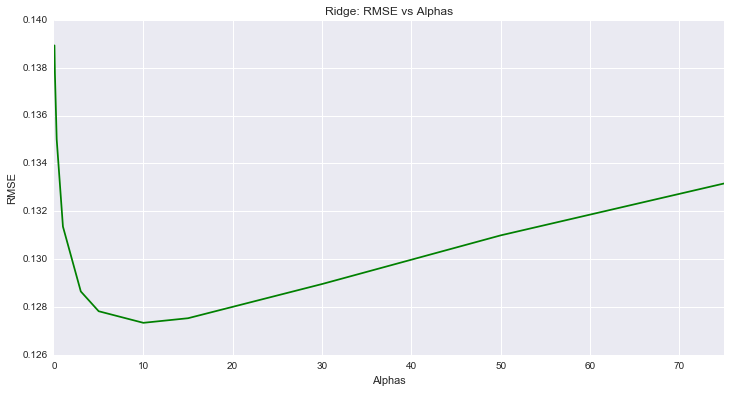

In [151]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Ridge: RMSE vs Alphas", color = 'green')
plt.xlabel("Alphas")
plt.ylabel("RMSE")

In [152]:
cv_ridge.min()

0.12733734668670779

In [153]:
model_lasso = LassoCV(alphas = [1, 0.5, 0.1, 0.05, 0.001, 0.0005]).fit(X_train, y)

In [154]:
rmse_cv(model_lasso).mean()

0.12314421090977434

(0, 0.3)

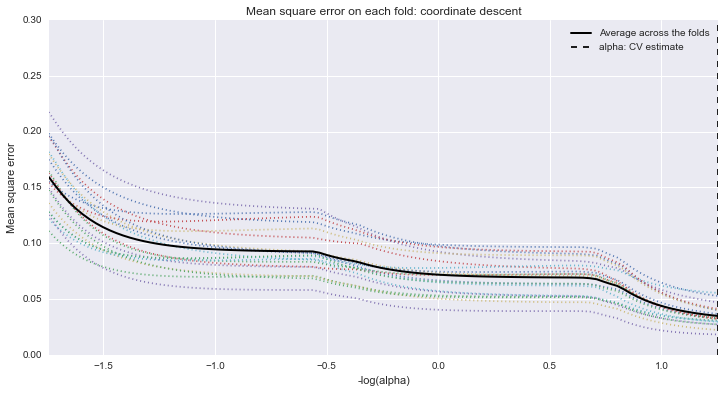

In [155]:
model = LassoCV(cv=20).fit(X_train, y)


# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 0, .3
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent')
plt.axis('tight')
plt.ylim(ymin, ymax)

### Multilayer Perceptron

In [156]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size = 0.33, random_state=42)

In [158]:
#first we scale our x variables
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
MLPA = MLPRegressor(activation = 'tanh', hidden_layer_sizes = (2,), solver ='sgd', learning_rate = 'constant', random_state = 42, batch_size = 40, 
                  learning_rate_init = 0.001)
MLPB = MLPRegressor(activation = 'tanh', hidden_layer_sizes = (15,), solver ='sgd', learning_rate = 'constant', random_state = 42, batch_size = 40, 
                  learning_rate_init = 0.001)
mse = make_scorer(mean_squared_error)

In [159]:
#A
score = cross_val_score(MLPA, X_train, y_train, cv = 5, scoring = mse)
print 'rmse A:', np.sqrt(score)
M = sum(np.sqrt(score))
print "AVG RMSE A:", M/5

#B
score = cross_val_score(MLPB, X_train, y_train, cv = 5, scoring = mse)
print 'rmse B:', np.sqrt(score)
M = sum(np.sqrt(score))
print "AVG RMSE B:", M/5

rmse A: [ 0.70451465  0.97869249  1.14226271  0.94263586  0.63891936]
AVG RMSE A: 0.881405013832
rmse B: [ 1.46040339  1.64331812  1.42216282  1.51289963  1.81816138]
AVG RMSE B: 1.57138906892


In [160]:
#getting training RMSe
trainmodelA = MLPA.fit(X_train, y_train)
trainmodelB = MLPB.fit(X_train, y_train)
pred_Ya = trainmodelA.predict(X_train)
pred_Yb = trainmodelB.predict(X_train)
scoreA = mean_squared_error(y_train, pred_Ya)
scoreB = mean_squared_error(y_train, pred_Yb)
print 'RMSE on training data for part A:', np.sqrt(scoreA)
print 'RMSE on training data for part B:', np.sqrt(scoreB)

#getting testing RMSE
testmodelA = MLPA.fit(X_train, y_train)
testmodelB = MLPB.fit(X_train, y_train)
pred_Ya = trainmodelA.predict(X_test)
pred_Yb = trainmodelB.predict(X_test)
scoreA = mean_squared_error(y_test, pred_Ya)
scoreB = mean_squared_error(y_test, pred_Yb)
print 'RMSE on test data for part A:', np.sqrt(scoreA)
print 'RMSE on test data for part B:', np.sqrt(scoreB)

RMSE on training data for part A: 0.359348115371
RMSE on training data for part B: 0.118397560319
RMSE on test data for part A: 0.258535566207
RMSE on test data for part B: 0.86556711139


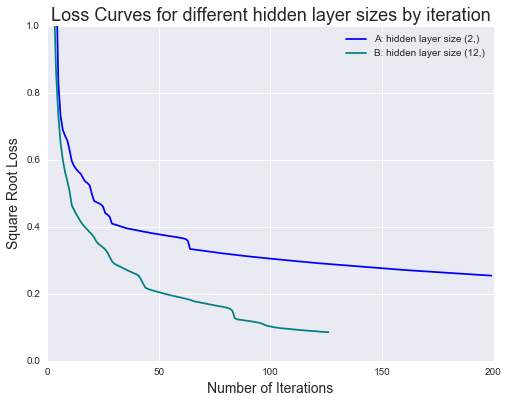

In [161]:
import seaborn

Acurve = np.sqrt(testmodelA.loss_curve_)
Bcurve = np.sqrt(testmodelB.loss_curve_)

plt.figure(figsize=(8,6))

ymin, ymax = 0, 1
plt.plot(Acurve, color='blue', label = 'A: hidden layer size (2,)')
plt.plot(Bcurve, color='teal', label = 'B: hidden layer size (12,)')
plt.ylabel('Square Root Loss', fontsize = 14)
plt.xlabel('Number of Iterations', fontsize = 14)
plt.title('Loss Curves for different hidden layer sizes by iteration', fontsize = 18)
plt.legend(loc='upper right')
plt.ylim(ymin, ymax)
plt.show()

### Submission for Kaggle

In [162]:
lasso_preds = model_lasso.predict(X_test)

In [165]:
solution = pd.DataFrame({"id":test_df.Id, "SalePrice":lasso_preds})
solution.to_csv("lasso_sol.csv", index = False)

AttributeError: 'DataFrame' object has no attribute 'Id'